In [1]:
def hide_code_in_slideshow():   
    from IPython import display
    import binascii
    import os
    uid = binascii.hexlify(os.urandom(8)).decode()    
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;
            while (!p.hasClass("cell")) {
                p=p.parent();
                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display.display_html(html, raw=True)


In [1]:
from IPython.display import Latex, HTML, Markdown

Markdown('''

# Artificial Intelligence

* ## Machine Learning
    * #### Reinforcement Learning
    * #### Generic Algorithms
      ...
    * ### Esemble Learning
        * #### <span style="color:blue">*Boosting of weak learners*</span>
        
        ...
    * ### *Artificial Neural Networks*
        * #### <span style="color:green">*Multi Layer Perceptron*</span>
        * #### <span style="color:green">*Feed forward Neural Networks*</span>
        * ##### <span style="color:orange">Deep Learning</span>
            * Convolutional Neural Networks
            * Recurrent Neural Networks
            
              ...
              
          ...
            
<span style="color:blue">■</span> Show quick example

<span style="color:green">■</span> Main focus

<span style="color:orange">■</span> Maybe future topic
''')



# Artificial Intelligence

* ## Machine Learning
    * #### Reinforcement Learning
    * #### Generic Algorithms
      ...
    * ### Esemble Learning
        * #### <span style="color:blue">*Boosting of weak learners*</span>
        
        ...
    * ### *Artificial Neural Networks*
        * #### <span style="color:green">*Multi Layer Perceptron*</span>
        * #### <span style="color:green">*Feed forward Neural Networks*</span>
        * ##### <span style="color:orange">Deep Learning</span>
            * Convolutional Neural Networks
            * Recurrent Neural Networks
            
              ...
              
          ...
            
<span style="color:blue">■</span> Show quick example

<span style="color:green">■</span> Main focus

<span style="color:orange">■</span> Maybe future topic



# Logical AND Problem


<IPython.core.display.Latex object>

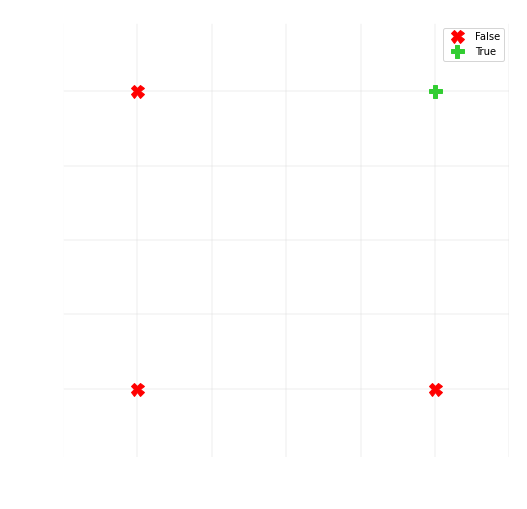

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
%matplotlib inline

def get_figure(size=(8, 8)):
    fig = plt.figure(figsize=size)
    ax = fig.gca()
    ax.set_axisbelow(True)
    ax.patch.set_alpha(0.)
    label_color = 'white'
    ax.set_title(ax.get_title(), color=label_color)
    plt.grid(linewidth=.2)
    
    [ax.spines[spine].set_color(label_color) for spine in ax.spines]
    ax.xaxis.label.set_color(label_color)
    ax.yaxis.label.set_color(label_color)
    ax.tick_params(axis='x', colors=label_color)
    ax.tick_params(axis='y', colors=label_color)
    
    return ax
    

def plot_problem(ax, data, title=''):
    for sample in data:
        sample_input = sample[0].astype(int)
        ground_truth = sample[1]

        if ground_truth: # If output is True
            sample_marker = 'P'
            sample_color = 'limegreen'
        else:
            sample_marker = 'X'
            sample_color = 'r'
            
        plt.plot(sample_input[0],
                sample_input[1],
                sample_marker,
                color=sample_color,
                markersize=13,
                label=ground_truth)
    plt.axis('equal')
    limits = [-.25, 1.25, -.25, 1.25]
   
    plt.grid(linewidth=.2)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    handles, labels = ax.get_legend_handles_labels()
    legends = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*legends))
    plt.title(title)
    
    
    ticks = np.arange(limits[0], 2*limits[1], .25)
    tick_labels = [str(tick) for tick in ticks]
    tick_labels[np.where(ticks == 0)[0][0]] += '\n(False)'
    tick_labels[np.where(ticks == 1)[0][0]] += '\n(True)'
    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_labels)
    ax.set_xticks(ticks)
    ax.set_xticklabels(tick_labels)
    plt.axis(limits)
    
    return legends


data_and = [(np.array([False, False]), False),
            (np.array([True, False]), False),
            (np.array([False, True]), False),
            (np.array([True, True]), True)]

ax = get_figure()
plot_problem(ax, data_and, title='Logical AND')

Latex('''
We have the data
\\begin{align}
\\mathbf{x_i} &\in \\left\\{
\\begin{pmatrix} false\\\ false\\end{pmatrix},
\\begin{pmatrix} true\\\ false\\end{pmatrix},
\\begin{pmatrix} true\\\ false\\end{pmatrix},
\\begin{pmatrix} true\\\ true\\end{pmatrix}
\\right\\}, \\\ 
&= \\left\\{
\\begin{pmatrix} 0\\\ 0\\end{pmatrix},
\\begin{pmatrix} 1\\\ 0\\end{pmatrix},
\\begin{pmatrix} 0\\\ 1\\end{pmatrix},
\\begin{pmatrix} 1\\\ 1\\end{pmatrix}
\\right\\} \\\ \\\ 
t_i &\in \\left\\{false, false, false, true
\\right\\} \\\ 
&= \\left\\{0, 0, 0, 1\\right\\}.
\\end{align}
where $\\mathbf{x_i}$ is an input sample and $z_i$ is the corresponding output target.
''')


# Solving the problem geometrically

<IPython.core.display.Latex object>

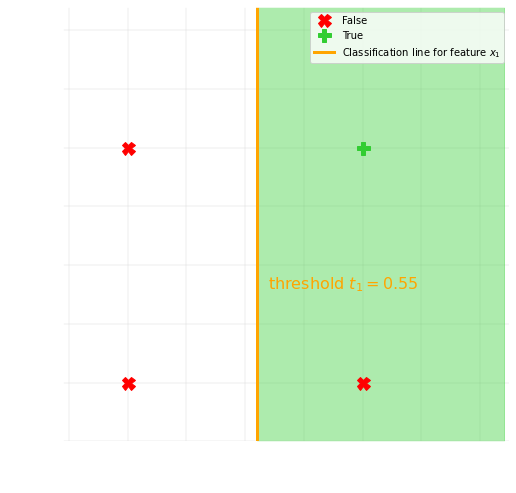

In [6]:

def plot_vector(position, direction, color, text='', width=.009, scalar=False, dx_text=0., dy_text=0.):
    if scalar:
        width=.006
        plt.quiver(direction[0], direction[1], -direction[0], -direction[1], color=color, angles='xy', scale_units='xy', scale=1, width=width)
    
    plt.quiver(position[0], position[1], direction[0], direction[1], color=color, angles='xy', scale_units='xy', scale=1, width=width)
    plt.text(position[0]+direction[0]/2+dx_text, position[1]+direction[1]/2-.06+dy_text, text, color=color, fontsize=14)

def plot_classifier(data,
                    dimension,
                    bias,
                    legends,
                    color='mediumslateblue',
                    text_color='navy',
                    fill_alpha=.4,
                    linewidth=3,
                    fontsize=16):    
    
    limits = [-.25, 1.6]
    
    if dimension == 0:
        plt.fill_betweenx(limits,
                          [bias]*2,
                          [max(limits)]*2,
                          alpha=fill_alpha,
                          color='limegreen')
        classification_plot = plt.plot([bias]*2,
                                       limits,
                                       linewidth=linewidth, 
                                       color=color)
        plt.text(bias+.05, .4, r'threshold $t_1 = %s$'%np.round(bias, 2), fontsize=fontsize, color=text_color)
        legends.append((classification_plot[0], r'Classification line for feature $x_1$'))

    else:
        plt.fill_between(limits,
                         [bias]*2,
                         [max(limits)]*2,
                         alpha=fill_alpha,
                         color='limegreen')
        classification_plot = plt.plot(limits,
                                       [bias]*2,
                                       linewidth=linewidth, 
                                       color=color)
        plt.text(-.1, bias+.05, r'threshold $t_2 = %s$'%np.round(bias, 2), fontsize=fontsize, color=text_color)
        legends.append((classification_plot[0], r'Classification line for feature $x_2$'))

    plt.legend(*zip(*legends))
    plt.axis(limits*2)


ax = get_figure()
legends = plot_problem(ax, data_and)

np.random.seed(0)
x1_bias = np.random.rand(1)[0]

dimension = 0
plot_classifier(data_and, dimension, x1_bias, legends, color='orange', text_color='orange')
Latex('''
Introduce weak classifier defined by thresholding $x_1$ with
\\begin{align*}
    x_1 \geq t_1 = %s.
\\end{align*}
Correctly classifies 3 out of 4.
'''%np.round(x1_bias, 2))

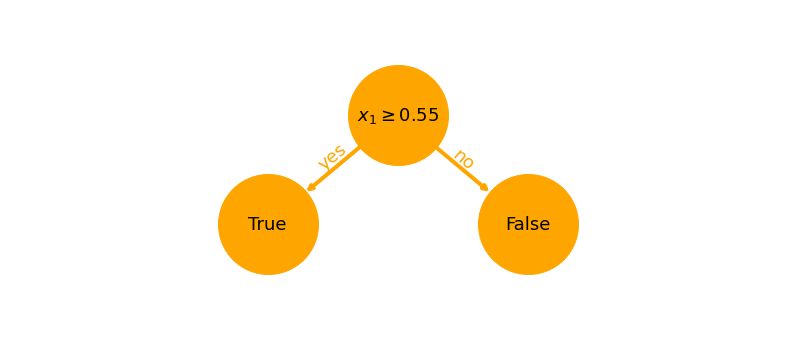

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def plot_logical_and_nn(features):
    plt.figure(figsize=(14, 2+4*len(features)))

    if ('1' in features[0]):
        color = 'orange'
        bias = x1_bias
    else:
        color = 'dodgerblue'
        bias = x2_bias
        
    feature1_node = [features[0] + r'$\geq %s$' % np.round(bias, 2)]*2
    output_nodes = [features[0] + '_yes',
                    features[0] + '_no']

    pos = {feature1_node[0]: (1.5, 2),
           output_nodes[0]: (1, 1),
           output_nodes[1]: (2, 1)}

    edge_labels = {(feature1_node[0], output_nodes[0]): 'yes',
                   (feature1_node[0], output_nodes[1]): 'no'}

    if len(features) == 2:
        feature1_node.extend([features[1] + r'$\geq %s$' % np.round(x1_bias, 2)]*2)
        feature2_node = [features[1] + r'$\geq %s$' % np.round(x2_bias, 2)]*4
        output_nodes.extend([features[0] + '_yes' + features[1] + '_no',
                             features[0] + '_no' + features[1] + '_no'])

        pos.update({feature1_node[2]: (3.5, 2),
                    output_nodes[2]: (3, 1),
                    output_nodes[3]: (4, 1)})
        edge_labels.update({(feature1_node[2], output_nodes[2]): 'yes',
                            (feature1_node[2], output_nodes[3]): 'no'})

        pos2 = {feature2_node[0]: (2.5, 3),
                feature1_node[0]: (1.5, 2),
                feature1_node[2]: (3.5, 2)}
        data_frame2 = {'feature2_node': feature2_node,
                       'feature1_node': feature1_node}
        network2 = nx.from_pandas_edgelist(pd.DataFrame(data_frame2),
                                           'feature2_node',
                                           'feature1_node',
                                           create_using=nx.DiGraph())
        nodes2 = nx.draw_networkx_nodes(network2, pos2,
                                        nodelist=network2.nodes,
                                        node_size=1.e4,
                                        node_shape='o',
                                        node_color='dodgerblue',
                                        alpha=1.)
        labels2 = dict(zip(pos2.keys(), pos2.keys()))
        nx.draw_networkx_labels(network2, pos2, labels2, font_size=18)
        nx.draw_networkx_edges(network2, pos2, node_size=1.e4,
                                       arrowstyle='->',
                                       edge_color='dodgerblue',
                                       width=4)

        edge_labels2 = {(feature2_node[0], feature1_node[0]): 'yes',
                        (feature2_node[1], feature1_node[2]): 'no'}

        nx.draw_networkx_edge_labels(network2, pos2, bbox=dict(facecolor='none', edgecolor='none'),
                                     font_size=18,
                                     font_color='dodgerblue',
                                     #label_pos=.6,
                                     verticalalignment='bottom',
                                     edge_labels=edge_labels2)

    data_frame = {'feature1_node': feature1_node,
                  'output_nodes': output_nodes}

    network = nx.from_pandas_edgelist(pd.DataFrame(data_frame),
                                      'feature1_node',
                                      'output_nodes',
                                      create_using=nx.DiGraph())

    nodes = nx.draw_networkx_nodes(network, pos,
                                   nodelist=network.nodes,
                                   node_size=1.e4,
                                   node_shape='o',
                                   node_color=color,
                                   alpha=1.)

    labels = dict(zip(pos.keys(), pos.keys()))
    labels[output_nodes[0]] = 'True'
    for i in range(len(output_nodes)):
        labels[output_nodes[i]] = 'True' if i == 0 else 'False'

    nx.draw_networkx_labels(network, pos, labels, font_size=18)
    nx.draw_networkx_edges(network, pos, node_size=1.e4,
                                   arrowstyle='->',
                                   edge_color=color,
                                   width=4)
    nx.draw_networkx_edge_labels(network, pos, bbox=dict(facecolor='none', edgecolor='none'),
                                 font_size=18,
                                 font_color=color,
                                 verticalalignment='baseline',
                                 edge_labels=edge_labels)

    plt.xlim(0, 1+2*len(features))
    plt.ylim(0, 2+len(features))

    plt.axis('off')
    plt.show()


plot_logical_and_nn([r'$x_1$'])


<IPython.core.display.Latex object>

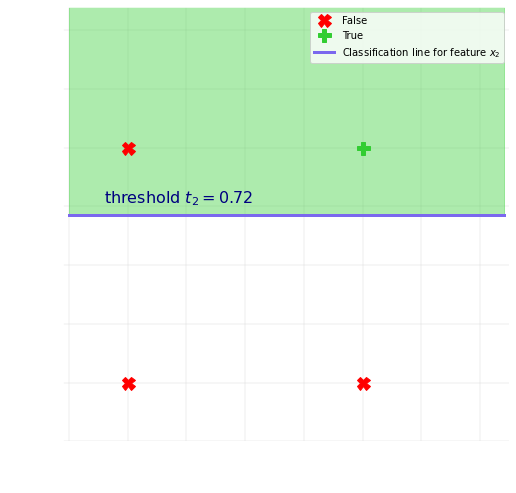

In [8]:

ax = get_figure()
legends = plot_problem(ax, data_and)

x2_bias = np.random.rand(1)[0]
dimension = 1
plot_classifier(data_and, dimension, x2_bias, legends)
Latex('''
Introduce another weak classifier defined by thresholding $x_2$ with
\\begin{align*}
    x_2 \geq t_2 = %s.
\\end{align*}
Also correctly classifies 3 out of 4.
'''%np.round(x2_bias, 2))

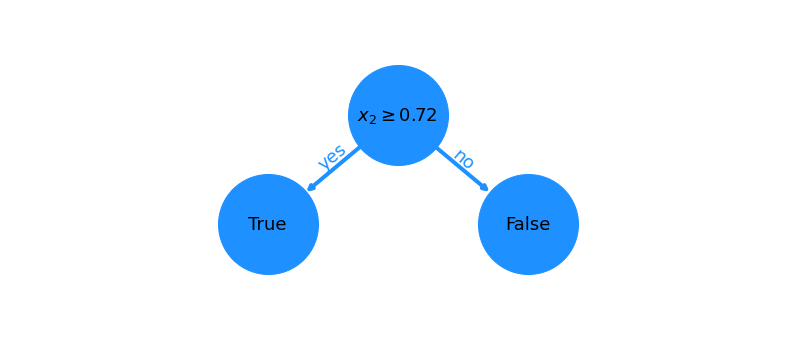

In [9]:
plot_logical_and_nn([r'$x_2$'])

<IPython.core.display.Latex object>

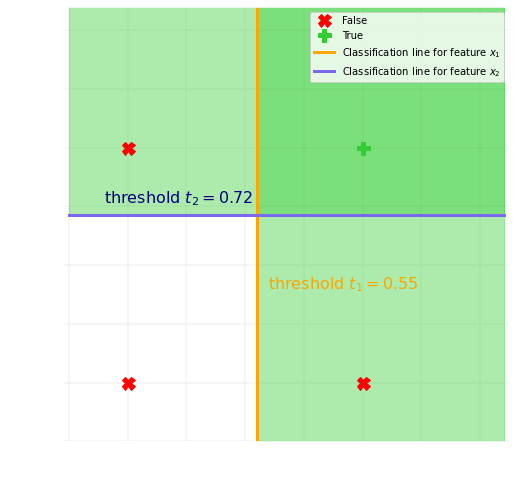

In [35]:

ax = get_figure()
legends = plot_problem(ax, data_and)

np.random.seed(0)
x1_bias = np.random.rand(1)[0]
plot_classifier(data_and, 0, x1_bias, legends, color='orange', text_color='orange')

x2_bias = np.random.rand(1)[0]
plot_classifier(data_and, 1, x2_bias, legends)

Latex('''
Boost classifier by voting, i.e. combining weak classifiers
\\begin{align*}
\\begin{cases}
    x_1 \geq t_1 = %s, \\\ 
    x_2 \geq t_2 = %s.
\\end{cases}
\\end{align*}
Will correctly classify all samples.
'''%tuple(np.round(np.array([x1_bias, x2_bias]), 2)))


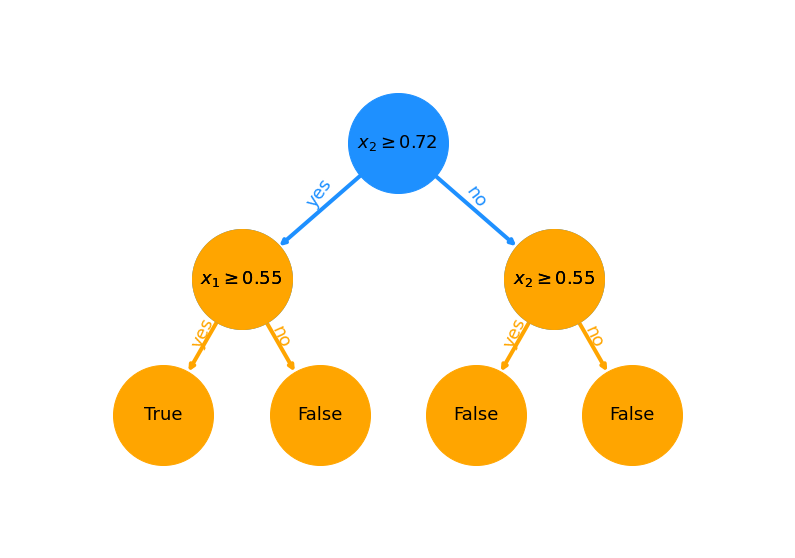

In [36]:
plot_logical_and_nn([r'$x_1$', r'$x_2$'])